<h1>House Prices Competition</h1>

<h2>Import Dependencies</h2>

In [92]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Import Data

In [93]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

<h2>Quick Look at the Data

In [94]:
#check the decoration
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h3>Observations</h3>
<p>Some of the features that look like they have a great impact in the Sale Price of an house are:</p>
<ul>
<li>OverallQual
<li>YearBuilt
<li>TotalBsmtSF
<li>GrLivArea
</ul>

<h3>Analysing 'SalePrice'

In [96]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\tiago\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Sale Price label')]

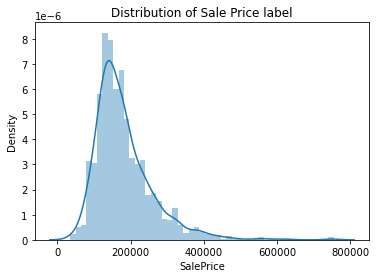

In [97]:
plot = sns.distplot(train_df['SalePrice'])
plot.set(title='Distribution of Sale Price label')

<h3>Observations</h3>
<ul>
<li>Deviate from the normal distribution.
<li>Have appreciable positive skewness.
<li>Shows peakedness.
</ul>

<p>Data with higher kurtosis have heavy tails and tend to have more outliers

In [99]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h3>Sale Price interaction with some features

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

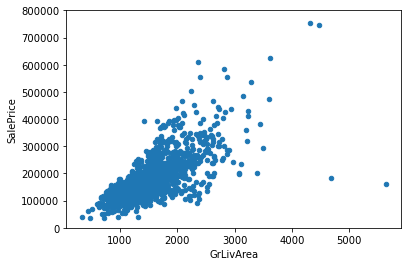

In [100]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<h3>Observations</h3>
<p>Looks like there is some type of relation between the feature 'GrLivArea' and the 'SalePrice'. More specifically a linear one

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

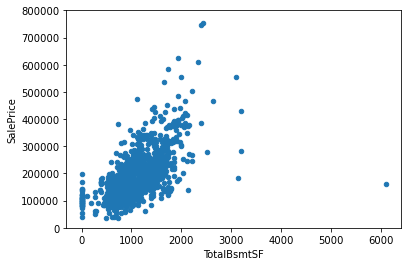

In [101]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<h3>Observations</h3>
<p>Looks like there is some type of relation between the feature 'TotalBsmtSF' and the 'SalePrice'. Appears to either be a linear relation with high slope or a a exponential one. I also looks like there is times when TotalBsmtSF has zero value but in those cases the SalePrice isnt always teh same. It seems that sometimes it has no impact on the SalePrice.

(-0.5, 9.5, 0.0, 800000.0)

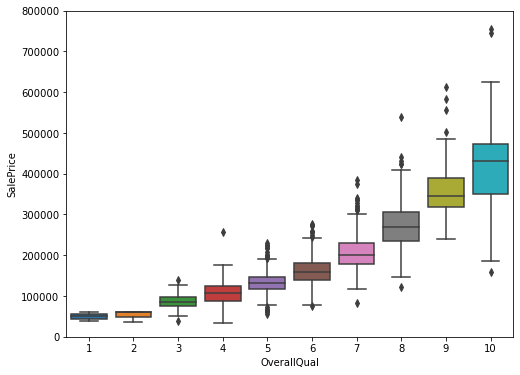

In [102]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<h3>Observations</h3>
<p>Looks like the better the OverallQual is, the higher the SalePrice

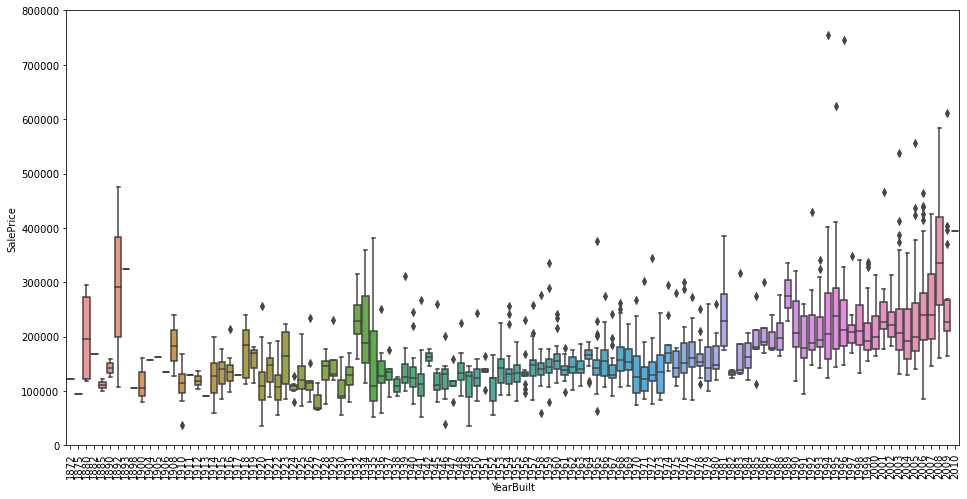

In [105]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<h3>Observations</h3>
<p>There is no aparent relation between YearBuilt and SalePrice. Though it looks like the more recent houses look like they have higher SalePrice</p>

<h4>Note</h4>
<p>One aspect to take into account in this analysis is that the YearSold is not teh same to all so the inflation is a value to take into account as well

<h3>In Summary</h3>
<p>The features 'GrLivArea', 'TotalBsmtSF' and 'OverallQual' all seem to have an impact in the SalePrice. There many more features that weren't analysed yet, but it is possible to assume that are others that also have good relation into the SalePrice.</p>
<p>From these facts it is possible to say that the trick is the correct choice of features (Feature Selection), rather the focus on deriving complex features form the one s already present (Feature Engineering).

<h2>Deeper Data Analysis<h2>

<p>Before, it was chosen a subjective approach to the observationn of the data, but this is not the most correct way of doing it. It is good to take an intial look up, but not sustainable to a grasp a very big feature collection.<p>

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Shapes of the dataframes
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [7]:
train_df['LotShape']

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
5       IR1
6       Reg
7       IR1
8       Reg
9       Reg
10      Reg
11      IR1
12      IR2
13      IR1
14      IR1
15      Reg
16      IR1
17      Reg
18      Reg
19      Reg
20      IR1
21      Reg
22      Reg
23      Reg
24      IR1
25      Reg
26      Reg
27      Reg
28      IR1
29      IR1
30      Reg
31      IR1
32      Reg
33      IR1
34      Reg
35      Reg
36      Reg
37      Reg
38      Reg
39      Reg
40      Reg
41      Reg
42      IR1
43      IR1
44      Reg
45      Reg
46      IR1
47      Reg
48      Reg
49      Reg
50      IR2
51      Reg
52      IR2
53      IR1
54      Reg
55      IR1
56      Reg
57      IR1
58      IR2
59      Reg
60      Reg
61      Reg
62      IR1
63      IR1
64      Reg
65      Reg
66      Reg
67      IR1
68      Reg
69      Reg
70      IR1
71      Reg
72      IR1
73      Reg
74      Reg
75      Reg
76      IR1
77      Reg
78      Reg
79      Reg
80      Reg
81      Reg
82      Reg
83  

<h2>Data Cleaning

In [8]:
# Simple function to expose clearer the info about missing and uniqueness of entries in the data
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
summary(train_df)

Dataset has 81 features and 1460 examples.


,Unique,Missing,Duplicated,Types
Id,1460,0,0,int64
MSSubClass,15,0,0,int64
MSZoning,5,0,0,object
LotFrontage,110,259,0,float64
LotArea,1073,0,0,int64
Street,2,0,0,object
Alley,2,1369,0,object
LotShape,4,0,0,object
LandContour,4,0,0,object
Utilities,2,0,0,object


[Text(0.5, 1.0, 'Distribution of Sale Price label')]

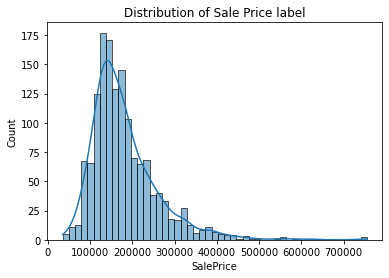

In [10]:
# Verify teh distribution of Sale Proce label in the training data
plot = sns.histplot(data=train_df['SalePrice'],kde=True)
plot.set(title='Distribution of Sale Price label')


In [11]:
# Mutual Information

X = train_df.copy()
y = X.pop('SalePrice')

for column in X.select_dtypes('object'):
    X[column], array = X[column].factorize()

In [12]:
discrete_features = X.dtypes == int
discrete_features

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [22]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Filling the NaN values for 0
X = X.fillna(0)

missing_values_count = X.isnull().sum()
missing_values_count

mi_scores = make_mi_scores(X,y,discrete_features)
type(mi_scores)

OverallQual      0.581031
Neighborhood     0.497348
GrLivArea        0.480573
GarageCars       0.371703
TotalBsmtSF      0.367789
YearBuilt        0.365685
GarageArea       0.364279
ExterQual        0.338958
BsmtQual         0.315463
KitchenQual      0.315365
1stFlrSF         0.307826
MSSubClass       0.272871
GarageFinish     0.260449
FullBath         0.259617
GarageYrBlt      0.259076
YearRemodAdd     0.241874
FireplaceQu      0.219073
GarageType       0.210618
LotFrontage      0.208033
TotRmsAbvGrd     0.207588
Foundation       0.199659
2ndFlrSF         0.199546
HeatingQC        0.172403
Exterior2nd      0.161163
Fireplaces       0.160049
LotArea          0.159264
BsmtFinType1     0.148879
BsmtFinSF1       0.146973
OpenPorchSF      0.141834
Exterior1st      0.136114
MSZoning         0.126719
BsmtUnfSF        0.117292
OverallCond      0.114289
WoodDeckSF       0.106591
LotShape         0.103318
MasVnrType       0.100482
MasVnrArea       0.097144
HouseStyle       0.091856
SaleType    

In [35]:
mi_scores['OverallQual']
aux = list(filter(lambda x: mi_scores[x] > 0.15, mi_scores.index))
aux

['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 '1stFlrSF',
 'MSSubClass',
 'GarageFinish',
 'FullBath',
 'GarageYrBlt',
 'YearRemodAdd',
 'FireplaceQu',
 'GarageType',
 'LotFrontage',
 'TotRmsAbvGrd',
 'Foundation',
 '2ndFlrSF',
 'HeatingQC',
 'Exterior2nd',
 'Fireplaces',
 'LotArea']

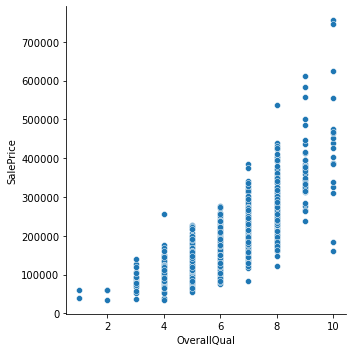

In [23]:
sns.relplot(x="OverallQual", y="SalePrice", data=train_df)

In [65]:
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['OverallQual']==10) & (train_df['SalePrice']<250000)].index)

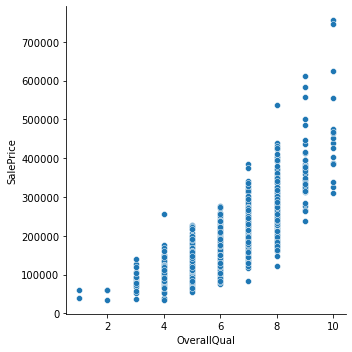

In [66]:
sns.relplot(x="OverallQual", y="SalePrice", data=train_df)

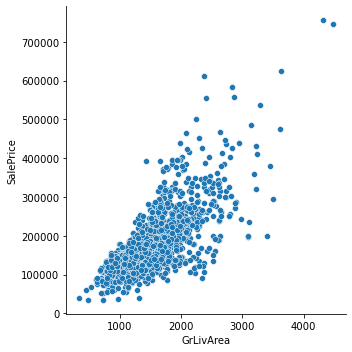

In [67]:
sns.relplot(x="GrLivArea", y="SalePrice", data=train_df)

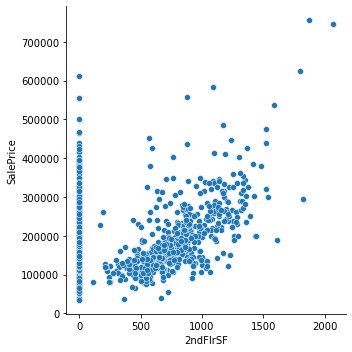

In [68]:
sns.relplot(x="2ndFlrSF", y="SalePrice", data=train_df)

C:\Users\tiago\AppData\Local\Temp/ipykernel_22760/2433698704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['SalePrice'] = train_df.loc[:,'SalePrice']


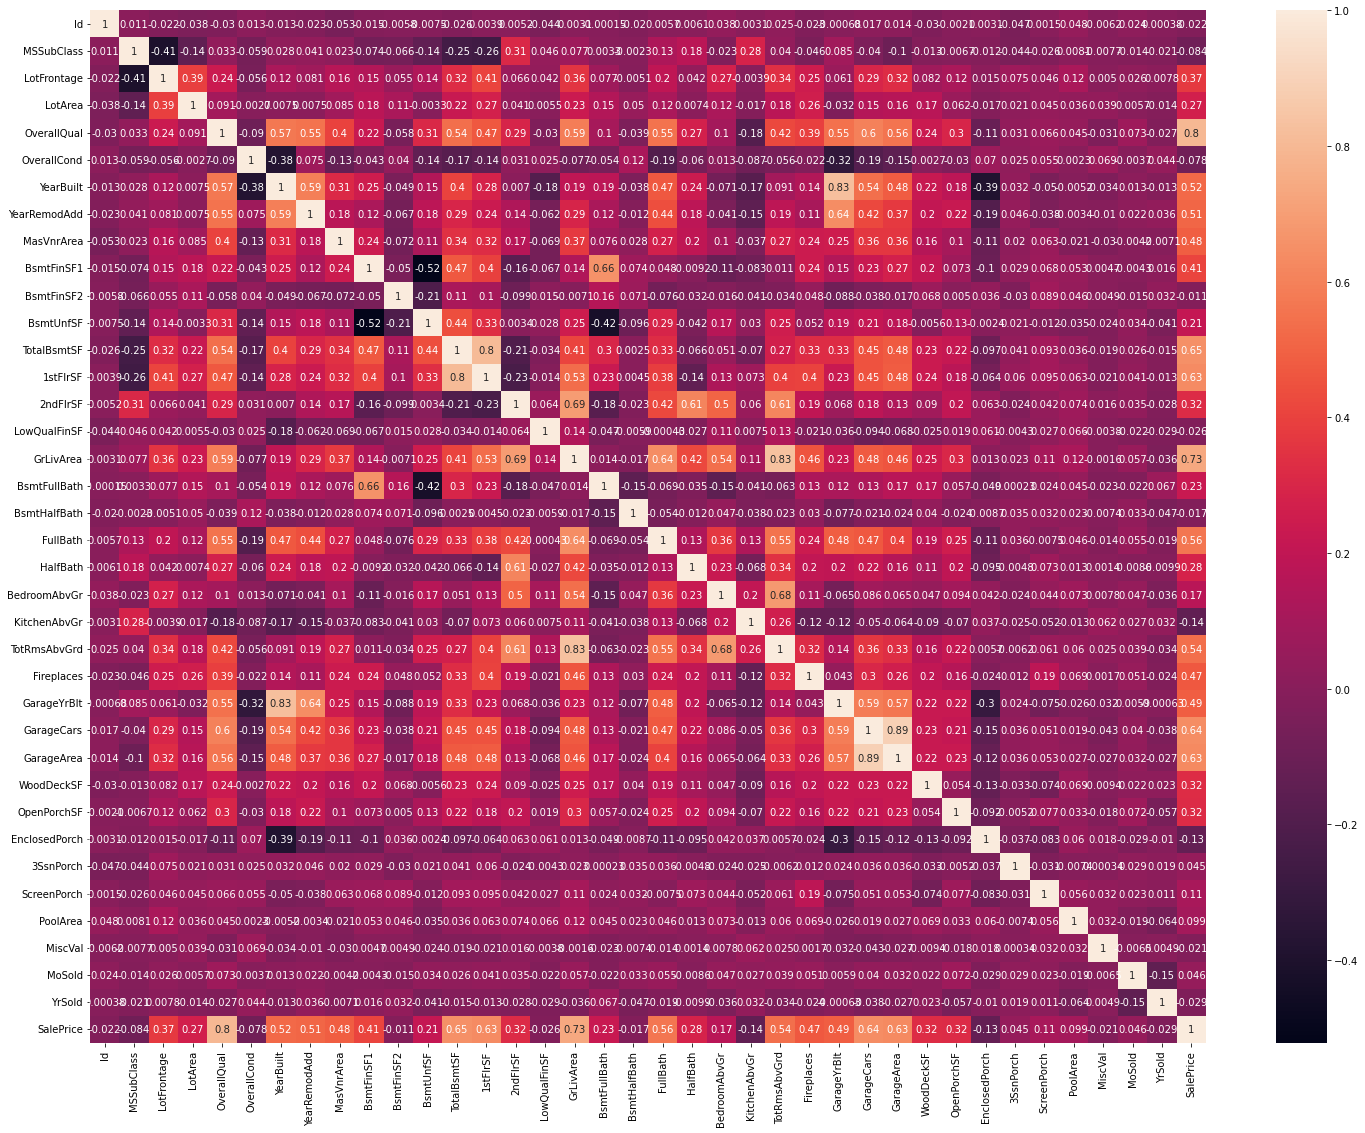

In [72]:
plt.figure(figsize=(25,19))
a = train_df[[a for a in aux]]
a['SalePrice'] = train_df.loc[:,'SalePrice']
a.head()
sns.heatmap(train_df.corr(), annot=True)
plt.show()

<h2> Data Visualization